In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats

In [3]:
data = pd.read_csv('Thesis_datasets/student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# # Define a list of columns to one-hot encode
# ohe_columns = []
# for col in data.columns:
#     if col not in ['age', 'absences', 'G1', 'G2', 'G3']:
#         ohe_columns.append(col)

# # Apply one-hot encoding to the combined dataset
# data = pd.get_dummies(data, drop_first=True, columns=ohe_columns)


In [5]:
# assuming your original dataframe is called 'data'
new_data = data.drop(columns=['school', 'sex', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsize', 'address', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Pstatus'])


In [6]:
new_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [7]:
# Create a new column called "performance" initialized with zeros
new_data['performance'] = 0

# Calculate the weight average for each row and assign it to the "performance" column
new_data['performance'] = (new_data['G1'] * 0.3) + (new_data['G2'] * 0.3) + (new_data['G3'] * 0.4)

In [8]:
# Standardize the data
new_data = (new_data - new_data.mean()) / new_data.std()


In [9]:
new_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,performance
0,1.021751,1.142407,1.358648,0.791247,-0.042232,-0.449374,0.062115,-0.235711,0.800464,-0.540014,-1.002518,-0.398784,0.036378,-1.780209,-1.253202,-0.963712,-1.314098
1,0.238078,-1.597982,-1.398197,-0.642435,-0.042232,-0.449374,1.177367,-0.235711,-0.097784,-0.540014,-1.002518,-0.398784,-0.213525,-1.780209,-1.519053,-0.963712,-1.393693
2,-1.329268,-1.597982,-1.398197,-0.642435,-0.042232,3.584777,0.062115,-0.235711,-0.996032,0.582646,0.550402,-0.398784,0.536185,-1.177653,-0.721500,-0.090624,-0.571207
3,-1.329268,1.142407,-0.479249,-0.642435,1.149321,-0.449374,-1.053136,-1.236851,-0.996032,-0.540014,-1.002518,1.039751,-0.463428,1.232570,0.873607,1.000735,1.073767
4,-0.545595,0.228944,0.439699,-0.642435,-0.042232,-0.449374,0.062115,-0.235711,-0.996032,-0.540014,-0.226058,1.039751,-0.213525,-1.478931,-0.189797,-0.090624,-0.491611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.589096,-0.684519,-0.479249,-0.642435,-0.042232,2.240060,1.177367,1.766567,0.800464,2.827967,2.103322,0.320484,0.661137,-0.575098,-0.455649,-0.308896,-0.438548
391,0.238078,0.228944,-1.398197,0.791247,-1.233786,-0.449374,-2.168388,0.765428,1.698712,1.705307,1.326862,-1.118051,-0.338477,0.931292,1.405309,1.219007,1.259489
392,3.372769,-1.597982,-1.398197,-0.642435,-1.233786,3.584777,1.177367,1.766567,-0.097784,1.705307,0.550402,-0.398784,-0.338477,-0.273820,-0.721500,-0.745440,-0.650802
393,1.021751,0.228944,-0.479249,2.224929,-1.233786,-0.449374,0.062115,0.765428,-1.894280,1.705307,1.326862,1.039751,-0.713332,0.027458,0.341905,-0.090624,0.065557


In [42]:
from sklearn.decomposition import PCA
import pandas as pd

# Extract the grades and calculate the performance column
grades = new_data[['G1', 'G2', 'G3']]
new_data['performance'] = grades.mean(axis=1) # calculate the mean of grades in G1, G2, and G3

# Perform PCA on the remaining variables
pca = PCA()
pca.fit(new_data.drop(columns=['G1', 'G2', 'G3', 'performance']))

# Get the loadings for the first principal component
loadings = pca.components_[0]

# Create a pandas series with the variable names and loadings
loadings_df = pd.Series(loadings, index=new_data.drop(columns=['G1', 'G2', 'G3', 'performance']).columns)

# Sort the variables by their absolute loading value
sorted_loadings = loadings_df.abs().sort_values(ascending=False)

# Print the variables and their loadings
print(sorted_loadings)


Walc          0.499993
Dalc          0.464190
goout         0.346352
failures      0.309929
studytime     0.272047
age           0.240981
freetime      0.238598
traveltime    0.195711
Medu          0.183349
Fedu          0.180407
absences      0.126286
health        0.089474
famrel        0.032981
dtype: float64


**For the PCA analysis, the pca.explained_variance_ratio_ command prints an array that shows the proportion of variance in the data explained by each principal component. For example, if the array looks like this:**

**[0.3, 0.2, 0.1, ...]**

**It means that the first principal component explains 30% of the total variance in the data, the second principal component explains 20%, and so on. The sum of all the values in the array is equal to 1, which means that together, the principal components explain 100% of the total variance in the data.**

**The loadings for each principal component represent the correlations between each variable and each principal component. In the context of this analysis, the loadings can help us understand which variables are most important for explaining the variation in the performance column.**

**For example, if the loadings for the first principal component show that variables such as studytime, absences, and failures have high absolute loadings, it suggests that these variables are strongly related to the academic performance of the students, as captured by the performance column.**

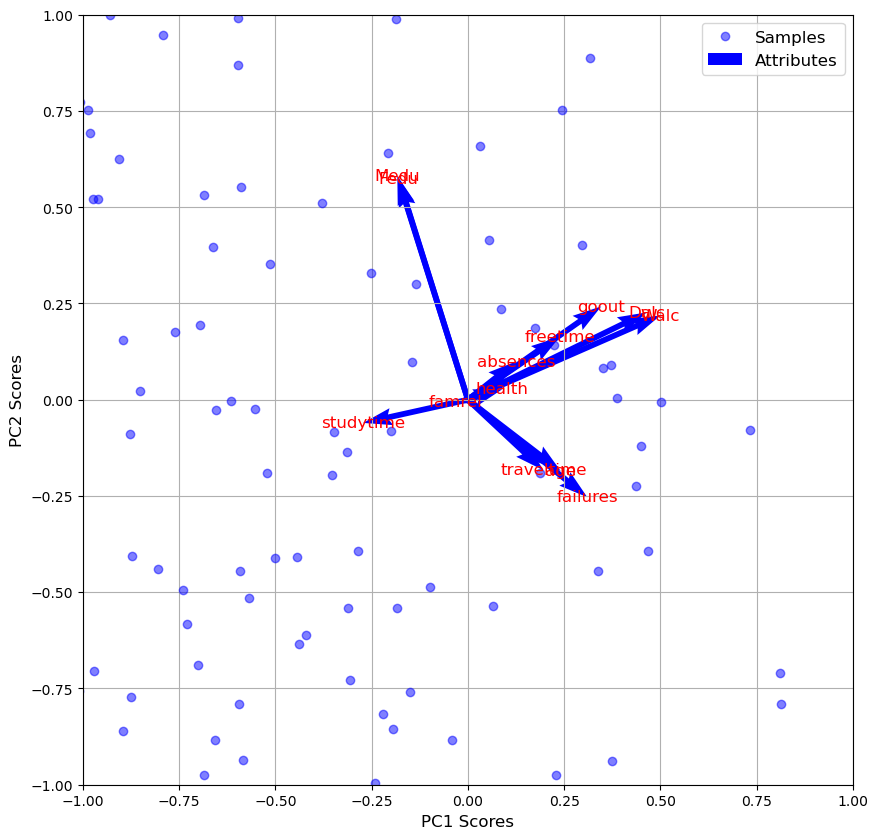

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the grades and calculate the performance column
grades = new_data[['G1', 'G2', 'G3']]
new_data['performance'] = grades.mean(axis=1)

# Perform PCA on the remaining variables
pca = PCA()
pca.fit(new_data.drop(columns=['G1', 'G2', 'G3', 'performance']))

# Get the scores for the principal components
scores = pca.transform(new_data.drop(columns=['G1', 'G2', 'G3', 'performance']))

# Get the loadings for the first principal components
loadings = pca.components_[0:2, :].T  # Use the first two principal components

# Create a plot to show attributes as vectors
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the PCA scores on the bottom and left axes
ax.plot(scores[:, 0], scores[:, 1], 'bo', alpha=0.5)
ax.set_xlabel("PC1 Scores", fontsize=12)
ax.set_ylabel("PC2 Scores", fontsize=12)

# Plot the loadings as vectors on the top and right axes
ax.quiver(np.zeros(loadings.shape[0]), np.zeros(loadings.shape[0]),
          loadings[:, 0], loadings[:, 1],
          angles='xy', scale_units='xy', scale=1, color='b')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')

# Add labels to the vectors
for i in range(loadings.shape[0]):
    ax.text(loadings[i, 0], loadings[i, 1], new_data.drop(columns=['G1', 'G2', 'G3', 'performance']).columns[i],
            color='r', ha='center', va='center', fontsize=12)

# Add legend
ax.legend(['Samples', 'Attributes'], fontsize=12)

# Add grid lines
ax.grid(True)

# Show the plot
plt.show()


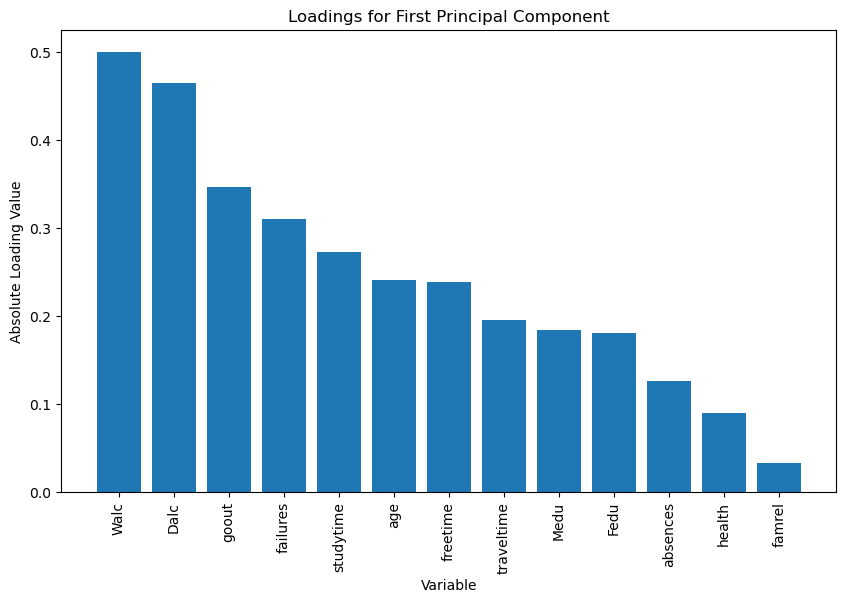

In [45]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Extract the grades and calculate the performance column
grades = new_data[['G1', 'G2', 'G3']]
new_data['performance'] = grades.mean(axis=1) # calculate the mean of grades in G1, G2, and G3

# Perform PCA on the remaining variables
pca = PCA()
pca.fit(new_data.drop(columns=['G1', 'G2', 'G3', 'performance']))

# Get the loadings for the first principal component
loadings = pca.components_[0]

# Create a pandas series with the variable names and loadings
loadings_df = pd.Series(loadings, index=new_data.drop(columns=['G1', 'G2', 'G3', 'performance']).columns)

# Sort the variables by their absolute loading value
sorted_loadings = loadings_df.abs().sort_values(ascending=False)

# Create a bar chart of the sorted loadings
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(sorted_loadings.index, sorted_loadings.values)
ax.set_title('Loadings for First Principal Component')
ax.set_xlabel('Variable')
ax.set_ylabel('Absolute Loading Value')
plt.xticks(rotation=90)
plt.show()


In [46]:
# Perform CFA on the grades
cfa = FactorAnalyzer(n_factors=1, method='ml', rotation=None)
cfa.fit(grades)

# Print the factor loadings for the grades
print(cfa.loadings_)

[[0.8687609 ]
 [0.98084301]
 [0.92254115]]


**For the CFA analysis, the loadings_ attribute of the FactorAnalyzer class prints the factor loadings for the grades in G1, G2, and G3. The factor loadings represent the degree to which each grade is related to the underlying factor of academic performance.**

**For example, if the factor loadings for G1, G2, and G3 are all close to 1, it suggests that the grades are strongly positively correlated and are measuring the same underlying construct of academic performance. On the other hand, if the factor loadings are lower and vary across the grades, it suggests that the grades are measuring different aspects of academic achievement and may not be strongly positively correlated.**

Factor Loadings:
G1    0.868761
G2    0.980843
G3    0.922541
dtype: float64


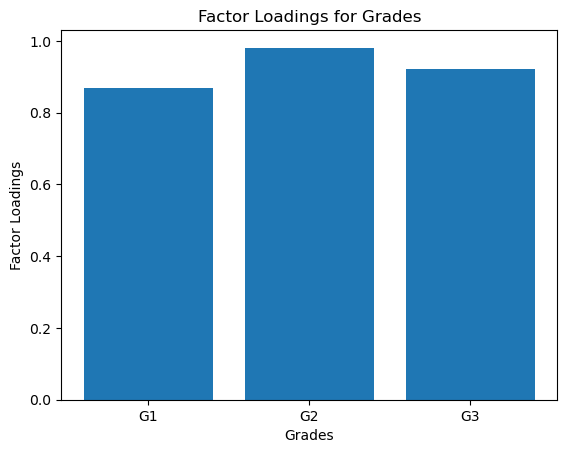

The factor loadings represent the strength and direction of the relationship between each grade and the underlying factor, which is an indicator of academic achievement. A factor loading of 1 indicates a perfect positive relationship, while a loading of -1 indicates a perfect negative relationship. In this case, all three grades have high factor loadings, indicating that they are strongly positively correlated with academic achievement.


In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Extract the grades and calculate the performance column
grades = new_data[['G1', 'G2', 'G3']]
new_data['performance'] = grades.mean(axis=1)

# Perform CFA on the grades
cfa = FactorAnalyzer(n_factors=1, method='ml', rotation=None)
cfa.fit(grades)

# Get the factor loadings for the grades
factor_loadings = cfa.loadings_

# Create a pandas series with the variable names and factor loadings
loadings_df = pd.Series(factor_loadings.flatten(), index=grades.columns)

# Print the variable names and factor loadings
print("Factor Loadings:")
print(loadings_df)

# Create a bar plot to visualize the factor loadings
plt.bar(grades.columns, factor_loadings.flatten())
plt.title("Factor Loadings for Grades")
plt.xlabel("Grades")
plt.ylabel("Factor Loadings")
plt.show()

# Explain the meaning of the results
print("The factor loadings represent the strength and direction of the relationship between each grade and the underlying factor, which is an indicator of academic achievement. A factor loading of 1 indicates a perfect positive relationship, while a loading of -1 indicates a perfect negative relationship. In this case, all three grades have high factor loadings, indicating that they are strongly positively correlated with academic achievement.")


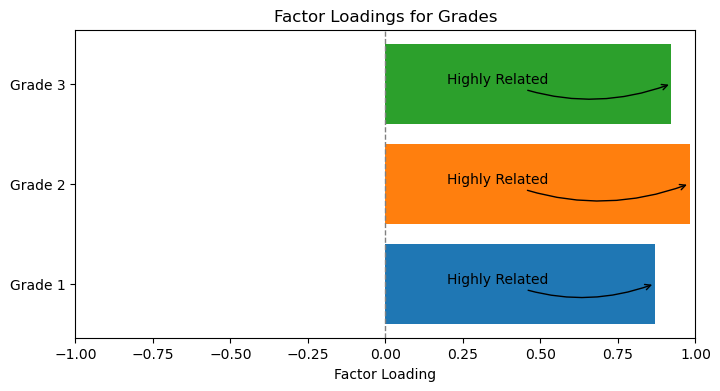

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Perform CFA on the grades
cfa = FactorAnalyzer(n_factors=1, method='ml', rotation=None)
cfa.fit(grades)

# Get the factor loadings for the grades
loadings = cfa.loadings_

# Define the labels and colors for the bar chart
labels = ['Grade 1', 'Grade 2', 'Grade 3']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plot the factor loadings as a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(labels, loadings.flatten(), color=colors)
ax.set_xlim([-1, 1])
ax.set_title('Factor Loadings for Grades')
ax.set_xlabel('Factor Loading')
ax.axvline(x=0, color='grey', linestyle='--', linewidth=1)

# Add annotations to explain the results
for i, grade in enumerate(grades.columns):
    if loadings[i] > 0.7:
        ax.annotate('Highly Related', xy=(loadings[i], labels[i]), xytext=(0.2, i),
                    arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    elif loadings[i] > 0.3:
        ax.annotate('Moderately Related', xy=(loadings[i], labels[i]), xytext=(0.2, i),
                    arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    else:
        ax.annotate('Not Related', xy=(loadings[i], labels[i]), xytext=(-0.7, i),
                    arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.2'))

plt.show()


In [49]:
import seaborn as sns

# Combine the factor scores and performance column into a new dataframe
df_factors = pd.DataFrame(factor_scores, columns=['Factor 1', 'Factor 2', 'Factor 3', ...])  # Replace '...' with actual column names
df_factors['Performance'] = new_data['performance']

# Plot scatter plots between factors and performance
sns.pairplot(df_factors, x_vars=['Factor 1', 'Factor 2', 'Factor 3', ...], y_vars=['Performance'])
plt.show()

# Calculate the correlation matrix
corr_matrix = df_factors.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


NameError: name 'factor_scores' is not defined

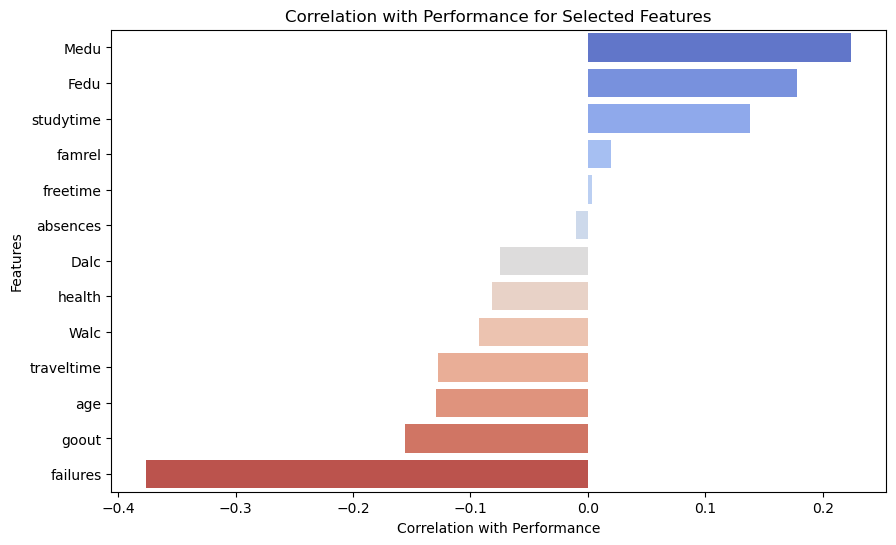

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and the 'performance' column
selected_features = ['Walc', 'Dalc', 'goout', 'failures', 'studytime', 'age', 'freetime', 'traveltime', 'Medu', 'Fedu', 'absences', 'health', 'famrel']
df_selected = new_data[selected_features + ['performance']]

# Calculate the correlations with the 'performance' column
correlations = df_selected[selected_features].corrwith(df_selected['performance'])

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Plot the bar plot of correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm')
plt.xlabel('Correlation with Performance')
plt.ylabel('Features')
plt.title('Correlation with Performance for Selected Features')
plt.show()


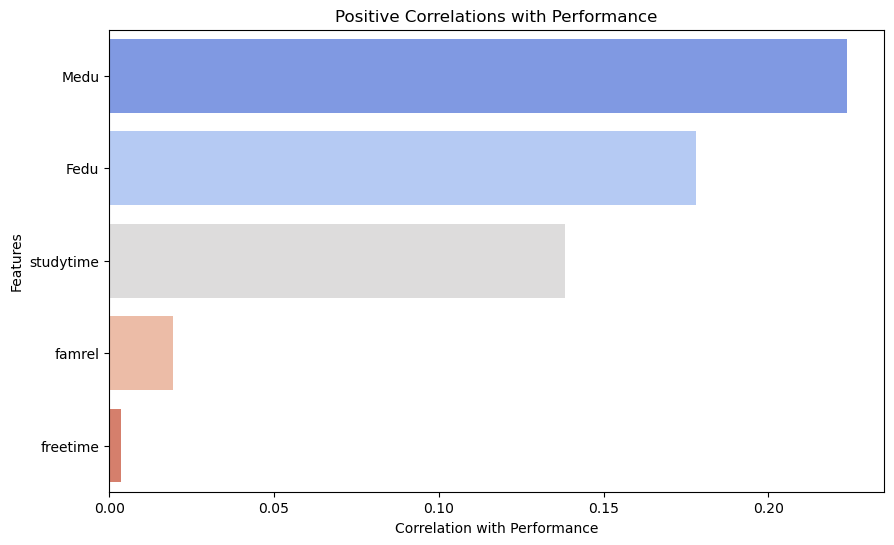

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
columns_to_exclude = ['performance', 'G1', 'G2', 'G3']
selected_columns = [col for col in new_data.columns if col not in columns_to_exclude]

# Calculate the correlations with the 'performance' column
correlations = new_data[selected_columns].corrwith(new_data['performance'])

# Filter the positive correlations
positive_correlations = correlations[correlations > 0]

# Sort the positive correlations in descending order
sorted_correlations = positive_correlations.sort_values(ascending=False)

# Plot the bar plot of positive correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm')
plt.xlabel('Correlation with Performance')
plt.ylabel('Features')
plt.title('Positive Correlations with Performance')
plt.show()


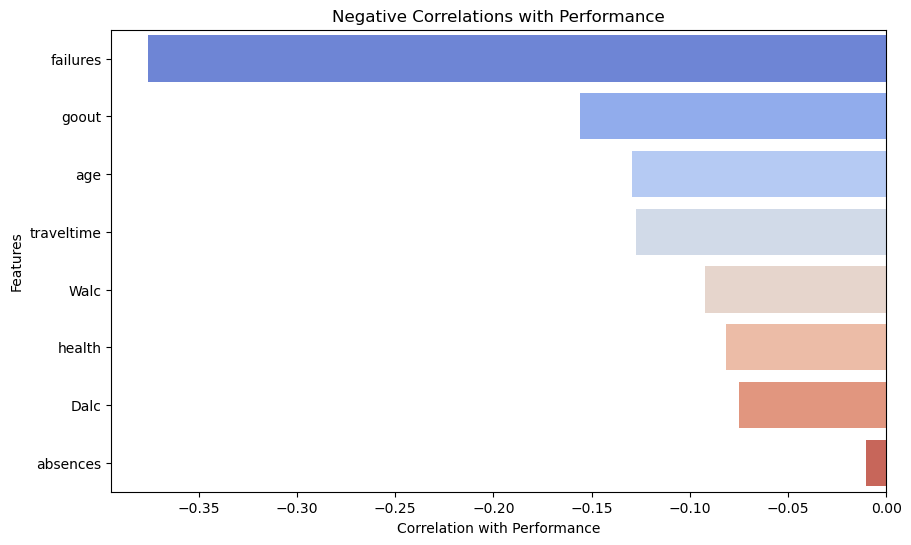

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
columns_to_exclude = ['performance', 'G1', 'G2', 'G3']
selected_columns = [col for col in new_data.columns if col not in columns_to_exclude]

# Calculate the correlations with the 'performance' column
correlations = new_data[selected_columns].corrwith(new_data['performance'])

# Filter the negative correlations
negative_correlations = correlations[correlations < 0]

# Sort the negative correlations in ascending order
sorted_correlations = negative_correlations.sort_values(ascending=True)

# Plot the bar plot of negative correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm')
plt.xlabel('Correlation with Performance')
plt.ylabel('Features')
plt.title('Negative Correlations with Performance')
plt.show()


In [20]:
import seaborn as sns

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['Walc'])
df_factors['Performance'] = new_data['performance']

# Plot scatter plot between 'Walc' and 'performance'
sns.scatterplot(data=df_factors, x='Walc', y='Performance')
plt.title('Scatter Plot: Walc vs Performance')
plt.show()


NameError: name 'factor_scores' is not defined

In [21]:
import seaborn as sns

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['Walc'])
df_factors['Performance'] = new_data['performance']

# Set up the scatter plot
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_factors, x='Walc', y='Performance', color='steelblue')

# Add labels and title
plt.title('Scatter Plot: Walc vs Performance', fontsize=16)
plt.xlabel('Walc', fontsize=12)
plt.ylabel('Performance', fontsize=12)

# Display the plot
plt.show()


NameError: name 'factor_scores' is not defined

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['Walc'])
df_factors['Performance'] = new_data['performance']

# Plot scatter plot with regression line and correlation coefficient
sns.regplot(data=df_factors, x='Walc', y='Performance', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot: Walc vs Performance')
plt.xlabel('Walc')
plt.ylabel('Performance')

# Calculate correlation coefficient
corr_coeff = df_factors['Walc'].corr(df_factors['Performance'])
plt.text(df_factors['Walc'].min(), df_factors['Performance'].max(), f"Correlation: {corr_coeff:.2f}", ha='left', va='top')

plt.show()


NameError: name 'factor_scores' is not defined

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['Dalc'])
df_factors['Performance'] = new_data['G3']

# Plot scatter plot with regression line and correlation coefficient
sns.regplot(data=df_factors, x='Dalc', y='Performance', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot: Dalc vs Performance')
plt.xlabel('Dalc')
plt.ylabel('Performance')

# Calculate correlation coefficient
corr_coeff = df_factors['Dalc'].corr(df_factors['Performance'])
plt.text(df_factors['Dalc'].min(), df_factors['Performance'].max(), f"Correlation: {corr_coeff:.2f}", ha='left', va='top')

plt.show()

NameError: name 'factor_scores' is not defined

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['goout'])
df_factors['Performance'] = new_data['performance']

# Plot scatter plot with regression line and correlation coefficient
sns.regplot(data=df_factors, x='goout', y='Performance', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot: goout vs Performance')
plt.xlabel('goout')
plt.ylabel('Performance')

# Calculate correlation coefficient
corr_coeff = df_factors['goout'].corr(df_factors['Performance'])
plt.text(df_factors['goout'].min(), df_factors['Performance'].max(), f"Correlation: {corr_coeff:.2f}", ha='left', va='top')

plt.show()

NameError: name 'factor_scores' is not defined

In [41]:
import seaborn as sns

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['Walc'])
df_factors['Performance'] = new_data['performance']

# Calculate the correlation matrix
corr_matrix = df_factors.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap: Walc vs Performance')
plt.show()



NameError: name 'factor_scores' is not defined

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the 'Walc' variable and the 'performance' column into a new dataframe
df_factors = pd.DataFrame(factor_scores[:, 0], columns=['Fedu'])
df_factors['Performance'] = new_data['performance']

# Plot scatter plot with regression line and correlation coefficient
sns.regplot(data=df_factors, x='Fedu', y='Performance', scatter_kws={'alpha':0.5})
plt.title('Scatter Plot: Fedu vs Performance')
plt.xlabel('Fedu')
plt.ylabel('Performance')

# Calculate correlation coefficient
corr_coeff = df_factors['Fedu'].corr(df_factors['Performance'])
plt.text(df_factors['Fedu'].min(), df_factors['Performance'].max(), f"Correlation: {corr_coeff:.2f}", ha='left', va='top')

plt.show()

NameError: name 'factor_scores' is not defined

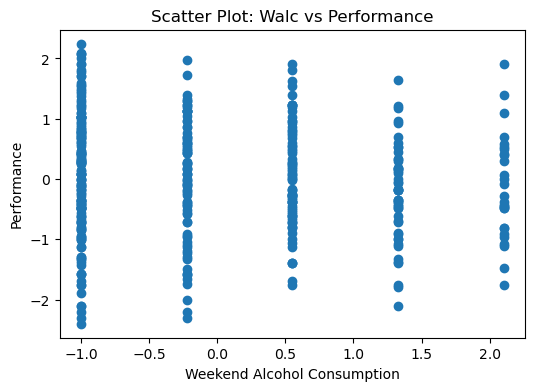

In [50]:
import matplotlib.pyplot as plt

# Create scatter plot for 'Walc' against 'performance'
plt.figure(figsize=(6, 4))
plt.scatter(new_data['Walc'], new_data['performance'])
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Performance')
plt.title('Scatter Plot: Walc vs Performance')
plt.show()


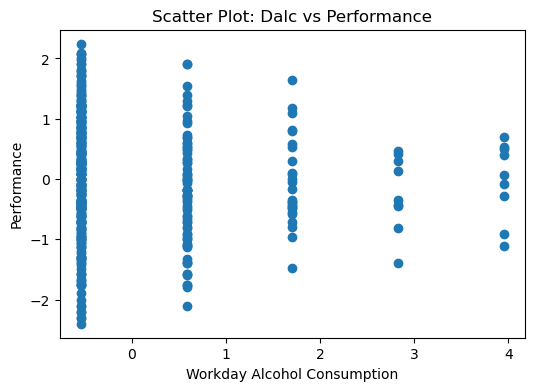

In [51]:
import matplotlib.pyplot as plt

# Create scatter plot for 'Dalc' against 'performance'
plt.figure(figsize=(6, 4))
plt.scatter(new_data['Dalc'], new_data['performance'])
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Performance')
plt.title('Scatter Plot: Dalc vs Performance')
plt.show()



In [52]:
import numpy as np
import statsmodels.api as sm

# Prepare the data
X = new_data['Dalc']  # Workday Alcohol Consumption
y = new_data['performance']  # Performance

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.208
Date:                Fri, 12 May 2023   Prob (F-statistic):              0.138
Time:                        16:04:42   Log-Likelihood:                -538.48
No. Observations:                 395   AIC:                             1081.
Df Residuals:                     393   BIC:                             1089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.048  -1.45e-16      1.0

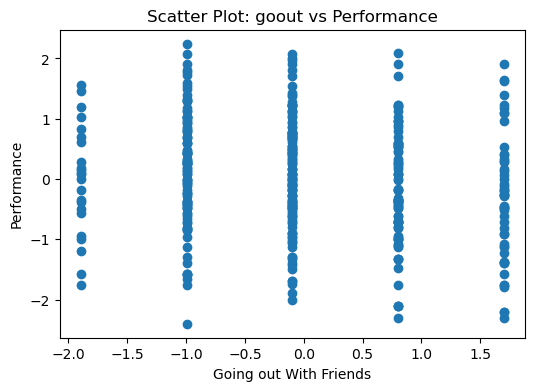

In [31]:
import matplotlib.pyplot as plt

# Create scatter plot for 'Dalc' against 'performance'
plt.figure(figsize=(6, 4))
plt.scatter(new_data['goout'], new_data['performance'])
plt.xlabel('Going out With Friends')
plt.ylabel('Performance')
plt.title('Scatter Plot: goout vs Performance')
plt.show()



In [37]:
import numpy as np
import statsmodels.api as sm

# Prepare the data
X = new_data['goout']  # Workday Alcohol Consumption
y = new_data['performance']  # Performance

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.789
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00189
Time:                        10:55:10   Log-Likelihood:                -534.72
No. Observations:                 395   AIC:                             1073.
Df Residuals:                     393   BIC:                             1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.047  -1.47e-16      1.0

In [32]:
import numpy as np
import statsmodels.api as sm

# Prepare the data
X = new_data['goout']  # Workday Alcohol Consumption
y = new_data['performance']  # Performance

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.789
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00189
Time:                        10:54:41   Log-Likelihood:                -534.72
No. Observations:                 395   AIC:                             1073.
Df Residuals:                     393   BIC:                             1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.047  -1.47e-16      1.0

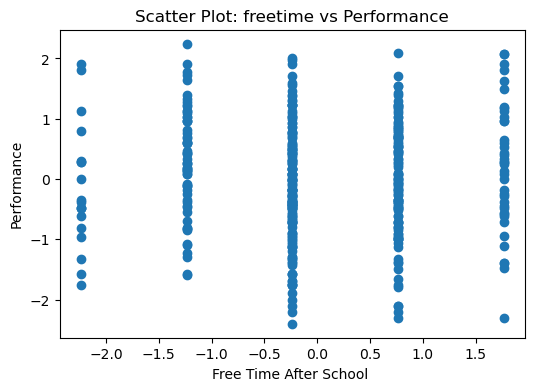

In [33]:
import matplotlib.pyplot as plt

# Create scatter plot for 'failures' against 'performance'
plt.figure(figsize=(6, 4))
plt.scatter(new_data['freetime'], new_data['performance'])
plt.xlabel('Free Time After School ')
plt.ylabel('Performance')
plt.title('Scatter Plot: freetime vs Performance')
plt.show()

In [38]:
import numpy as np
import statsmodels.api as sm

# Prepare the data
X = new_data['freetime']  # Workday Alcohol Consumption
y = new_data['performance']  # Performance

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.004981
Date:                Fri, 12 May 2023   Prob (F-statistic):              0.944
Time:                        12:07:36   Log-Likelihood:                -539.58
No. Observations:                 395   AIC:                             1083.
Df Residuals:                     393   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.048  -1.45e-16      1.0

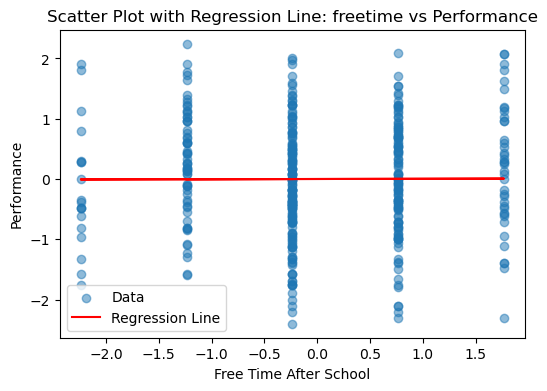

In [59]:
import matplotlib.pyplot as plt

# Prepare the data
X = new_data['freetime']
y = new_data['performance']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Plot the data points and the regression line
plt.figure(figsize=(6, 4))
plt.scatter(X['freetime'], y, alpha=0.5, label='Data')
plt.plot(X['freetime'], results.predict(X), color='r', label='Regression Line')
plt.xlabel("Free Time After School")
plt.ylabel('Performance')
plt.title('Scatter Plot with Regression Line: freetime vs Performance')
plt.legend()
plt.show()


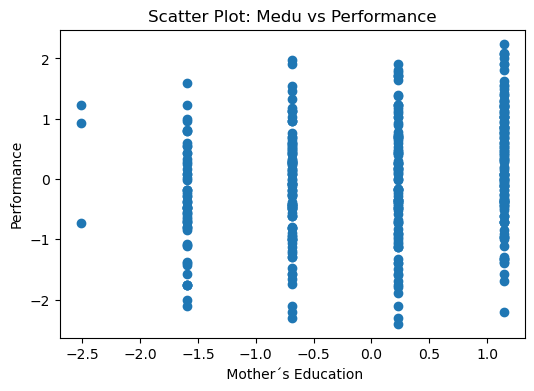

In [34]:
import matplotlib.pyplot as plt

# Create scatter plot for 'failures' against 'performance'
plt.figure(figsize=(6, 4))
plt.scatter(new_data['Medu'], new_data['performance'])
plt.xlabel(' Mother´s Education')
plt.ylabel('Performance')
plt.title('Scatter Plot: Medu vs Performance')
plt.show()

In [53]:
import numpy as np
import statsmodels.api as sm

# Prepare the data
X = new_data['Medu']  # Workday Alcohol Consumption
y = new_data['performance']  # Performance

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     20.75
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.99e-06
Time:                        16:25:56   Log-Likelihood:                -529.42
No. Observations:                 395   AIC:                             1063.
Df Residuals:                     393   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.047  -1.49e-16      1.0

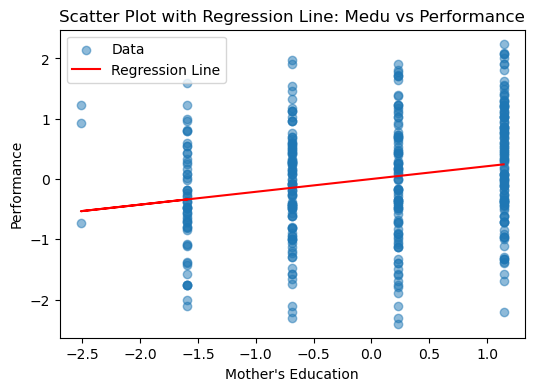

In [58]:
import matplotlib.pyplot as plt

# Prepare the data
X = new_data['Medu']
y = new_data['performance']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Plot the data points and the regression line
plt.figure(figsize=(6, 4))
plt.scatter(X['Medu'], y, alpha=0.5, label='Data')
plt.plot(X['Medu'], results.predict(X), color='r', label='Regression Line')
plt.xlabel("Mother's Education")
plt.ylabel('Performance')
plt.title('Scatter Plot with Regression Line: Medu vs Performance')
plt.legend()
plt.show()


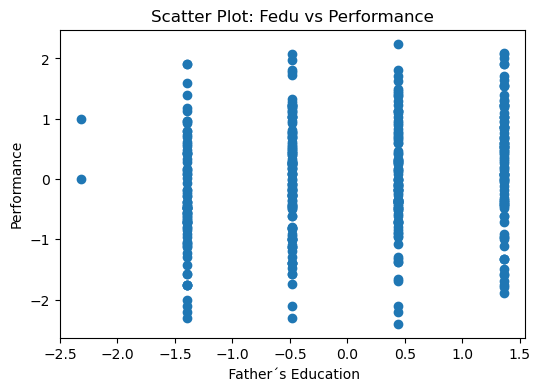

In [35]:
import matplotlib.pyplot as plt

# Create scatter plot for 'failures' against 'performance'
plt.figure(figsize=(6, 4))
plt.scatter(new_data['Fedu'], new_data['performance'], color='C0')
plt.xlabel(' Father´s Education')
plt.ylabel('Performance')
plt.title('Scatter Plot: Fedu vs Performance')
plt.show()

In [61]:
import numpy as np
import statsmodels.api as sm

# Prepare the data
X = new_data['Fedu']  # Workday Alcohol Consumption
y = new_data['performance']  # Performance

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                Fri, 12 May 2023   Prob (F-statistic):           0.000373
Time:                        18:29:58   Log-Likelihood:                -533.21
No. Observations:                 395   AIC:                             1070.
Df Residuals:                     393   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.047  -1.47e-16      1.0

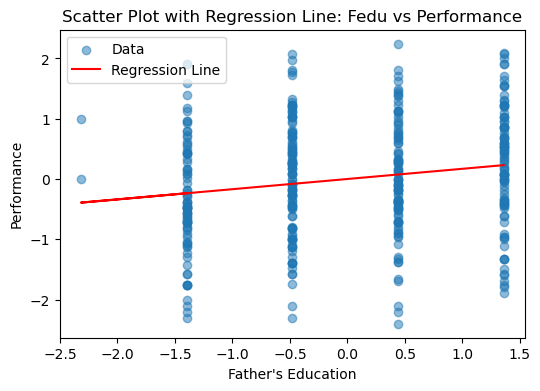

In [60]:
import matplotlib.pyplot as plt

# Prepare the data
X = new_data['Fedu']
y = new_data['performance']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Plot the data points and the regression line
plt.figure(figsize=(6, 4))
plt.scatter(X['Fedu'], y, alpha=0.5, label='Data')
plt.plot(X['Fedu'], results.predict(X), color='r', label='Regression Line')
plt.xlabel("Father's Education")
plt.ylabel('Performance')
plt.title('Scatter Plot with Regression Line: Fedu vs Performance')
plt.legend()
plt.show()